In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Generate sample data
dates = pd.date_range('2023-01-01', periods=100)
closing_prices = np.random.normal(loc=100, scale=10, size=100)

# Create DataFrame
data = pd.DataFrame({'Date': dates, 'Closing_Price': closing_prices})
data.head()


,Date,Closing_Price
0,2023-01-01,108.698248
1,2023-01-02,113.135092
2,2023-01-03,110.581758
3,2023-01-04,95.771799
4,2023-01-05,100.370652


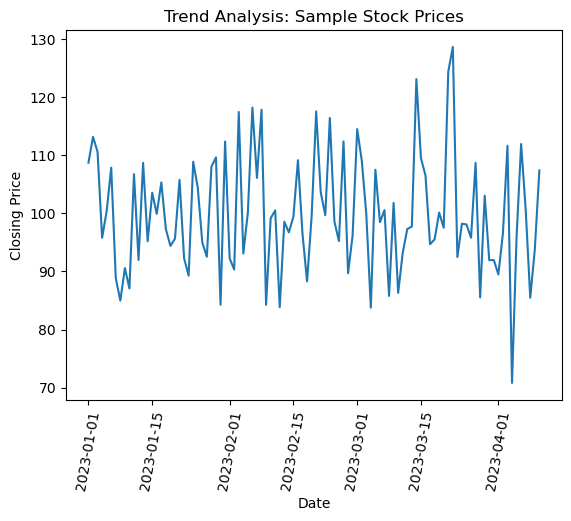

In [3]:
# Plotting trend
plt.plot(data['Date'], data['Closing_Price'])
plt.title('Trend Analysis: Sample Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=80)
plt.show()

In [4]:
# Generate sample data
dates = pd.date_range('2023-01-01', periods=365)
monthly_sales = np.sin(np.arange(365) * 2 * np.pi / 30) * 1000 + np.random.normal(0, 200, 365)

# Create DataFrame
data = pd.DataFrame({'Date': dates, 'Sales': monthly_sales})

# Extract month from date
data['Month'] = data['Date'].dt.month

data.head()

,Date,Sales,Month
0,2023-01-01,58.307623,1
1,2023-01-02,-77.765494,1
2,2023-01-03,160.437755,1
3,2023-01-04,522.980245,1
4,2023-01-05,659.634589,1


In [5]:
# Plotting seasonality
monthly_sales = data.groupby('Month')['Sales'].mean()
monthly_sales

Month
1      4.884316
2     36.896397
3     37.073010
4     51.356604
5    -21.974582
6     11.907079
7     36.394818
8      6.541469
9    -48.938847
10    33.387172
11    21.914236
12    82.415915
Name: Sales, dtype: float64

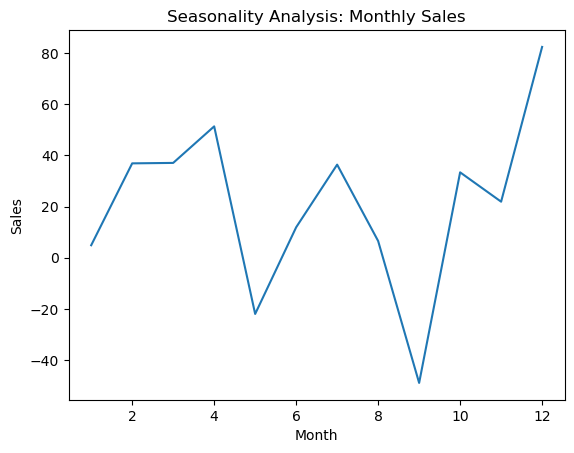

In [6]:
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Seasonality Analysis: Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [7]:
# Generate sample data
years = pd.date_range('2000-01-01', periods=20, freq='Y')
gdp_data = np.sin(np.arange(20) * 2 * np.pi / 6) * 1000 + np.random.normal(0, 200, 20)

# Create DataFrame
data = pd.DataFrame({'Year': years, 'GDP': gdp_data})

data.head()

,Year,GDP
0,2000-12-31,-1.267146
1,2001-12-31,851.289196
2,2002-12-31,889.418596
3,2003-12-31,219.260905
4,2004-12-31,-788.774440


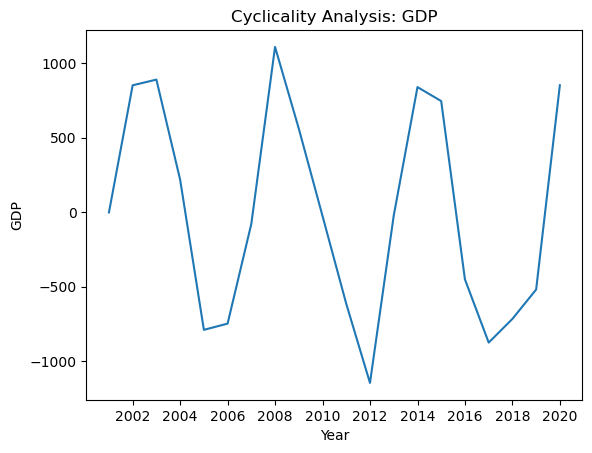

In [8]:
# Plotting cyclicality
plt.plot(data['Year'], data['GDP'])
plt.title('Cyclicality Analysis: GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [9]:
# Generate sample data
dates = pd.date_range('2023-01-01', periods=100)
temperature_data = np.random.normal(loc=20, scale=5, size=100)

# Create DataFrame
data = pd.DataFrame({'Date': dates, 'Temperature': temperature_data})

data.head()

,Date,Temperature
0,2023-01-01,15.545275
1,2023-01-02,23.607147
2,2023-01-03,24.287717
3,2023-01-04,22.050068
4,2023-01-05,13.946238


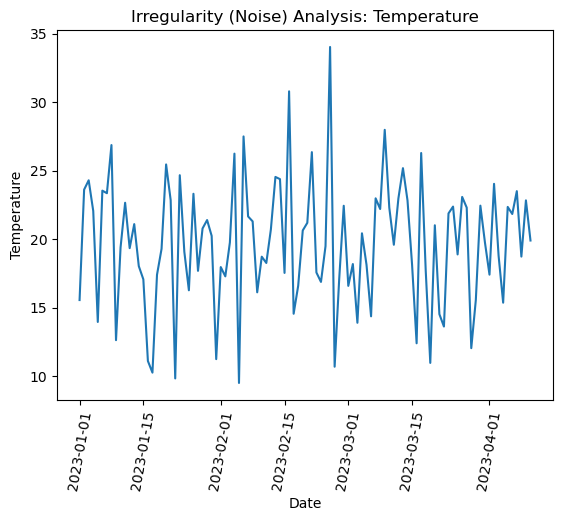

In [10]:
# Plotting irregularity
plt.plot(data['Date'], data['Temperature'])
plt.title('Irregularity (Noise) Analysis: Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=80)
plt.show()

In [11]:
# Generate sample data
data = np.random.randn(1000)

# Perform Dickey-Fuller test for stationarity
result = adfuller(data)
adf_statistic, p_value, critical_values = result[0], result[1], result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:', critical_values)

ADF Statistic: -31.846293455585936
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}


In [12]:
# Generate sample data
sales_data = np.random.normal(loc=100, scale=10, size=100)

# Create DataFrame
data = pd.DataFrame({'Sales': sales_data})

# Fit ARIMA model
model = ARIMA(data['Sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)
print('Forecasted Sales:', forecast)

Forecasted Sales: 100    98.164815
101    93.311332
102    97.490191
103    98.520035
104    97.253891
105    97.051061
106    97.101155
107    97.309909
108    97.443397
109    97.276093
Name: predicted_mean, dtype: float64
